# Chennai based Real Estate Investment Indicator using IT Park as Indicies 

### The project suggest the areas for the investors to plan for residential and commercial lands near IT companies to benefit in futureby choosing the places under construction or planning

###### The following cell imports all the required libaries 

In [78]:

!conda install -c conda-forge geocoder --yes
print ("install geocoder")

import geocoder

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

failed

CondaError: KeyboardInterrupt

install geocoder
failed

CondaError: KeyboardInterrupt

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


In [2]:
import requests 
# library to handle requests
import pandas as pd 
# library for data analsysis
import numpy as np 
# library to handle data in a vectorized manner
import random 
# library for random number generation
from bs4 import BeautifulSoup 
# library for web scrapping 
print("imported")


imported


###### The IT company html is downloaded and stored in the dataframe

In [4]:
IT = pd.read_html('https://en.wikipedia.org/wiki/List_of_tech_parks_in_Chennai')
IT_data=IT[1]
IT_data


,Company name,Lakh sqft,Address,Investment,Start datecurrent status,Notable clients
0,Tidel Park,15.00,Taramani,NaN,2000,"Cisco Systems, Sify, Tenneco, Trimble"
1,Tidel Park Avadi (Phase 1),5.57,AVADI (Pattabiram),230 crores,Construction Going On,NaN
2,"International Tech Park, Chennai",20.00,Taramani,NaN,2011,"Amazon, Siemens, Caterpiller, Inautix, Visual ..."
3,Olympia Tech Park,13.00,Guindy,240,2006,"HP, Verizon, ABN Amro, Visteon, Hewitt, Merril..."
4,"Mahindra World City, New Chennai",NaN,NaN,NaN,2002,"Infosys,[1] BMW, Braun, TTK Group, Capgemini, ..."
...,...,...,...,...,...,...
104,Yekediar farms - (unnamed),2.10,Okkiam Torappakkam,NaN,UC,NaN
105,Matrix towers - (SSPDL),2.50,Perungudi,NaN,Completed,NaN
106,Succons OKI Infotech Park,1.20,Navallur,NaN,NaN,NaN
107,One IndiaBulls Park,24.00,Ambattur Industrial Estate,NaN,2006,"Royal Bank of Scotland, Vodafone Essar, Telebu..."


###### The data is preprocessed to remove the unwanted columns

In [5]:
IT_data=IT_data[['Company name','Lakh sqft','Address','Start datecurrent status']]
IT_data.rename(columns={'Start datecurrent status':'Status'},inplace=True)
IT_data.head()


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:5042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Company name,Lakh sqft,Address,Status
0,Tidel Park,15.00,Taramani,2000
1,Tidel Park Avadi (Phase 1),5.57,AVADI (Pattabiram),Construction Going On
2,"International Tech Park, Chennai",20.00,Taramani,2011
3,Olympia Tech Park,13.00,Guindy,2006
4,"Mahindra World City, New Chennai",NaN,NaN,2002


###### Print the Size of the Data

In [52]:
IT_data.shape

(109, 5)

###### Explore the neighborhood data of  Chennai City

In [56]:
url = 'https://en.wikipedia.org/wiki/List_of_neighbourhoods_of_Chennai'
source = requests.get(url).text
chennaidata = BeautifulSoup(source, 'lxml')
column_names = ['Area','Latitude','Longitude']
chennai_loc = pd.DataFrame(columns = column_names)


In [57]:
content = chennaidata.find('table', class_='wikitable sortable')
table=content.tbody

In [58]:
a=b=c=0
for tr in table.find_all('tr'):
    i=0
    for td in tr.find_all('td'):   
        if i==0:
            a=td.text.strip('\n')
        elif i==2:
            b=float(td.text.strip("\n"))
        elif i==3:
            c=float(td.text.strip("\n"))
        i+=1
    chennai_loc = chennai_loc.append({'Area': a,'Latitude':b, 'Longitude':c},ignore_index=True)
chennai_loc.head()


,Area,Latitude,Longitude
0,0,0,0
1,Adambakkam,12.988,80.2047
2,Adyar,13.0012,80.2565
3,Alandur,12.9975,80.2006
4,Alapakkam,13.049,80.1673


In [59]:
chennai_loc = chennai_loc[chennai_loc.Latitude!= 0]
chennai_loc.drop_duplicates()
chennai_loc.rename(columns={'Area' : 'Address'}, inplace=True)
chennai_loc.head()

,Address,Latitude,Longitude
1,Adambakkam,12.988,80.2047
2,Adyar,13.0012,80.2565
3,Alandur,12.9975,80.2006
4,Alapakkam,13.049,80.1673
5,Alwarthirunagar,13.0426,80.184


###### Combine IT park data and Latitude and Longitude

In [61]:
finaldata=pd.merge(IT_data,chennai_loc, on='Address')
finaldata.shape



(33, 7)

######  Draw the map of Chennai City

In [62]:
address = 'Chennai, Tamil Nadu'

geolocator = Nominatim(user_agent="chennai_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of chennai are {}, {}.'.format(latitude, longitude))
map_itpark = folium.Map(location=[latitude ,longitude],zoom_start=11)
map_itpark

The geographical coordinate of chennai are 13.0836939, 80.270186.


###### Plot the IT park Locations

In [63]:

i=0
for lat,lng,a,b in zip(finaldata['Latitude'],finaldata['Longitude'],finaldata['Company name'],finaldata['Status']):
    lat=float(lat)
    lng=float(lng)
    label = '{},{},{}'.format(i,a,b)
    label = folium.Popup(label, parse_html=True)
    i=i+1
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='brown',
    fill=True,
    fill_color='brown',
    fill_opacity=0.7,
    parse_html=False).add_to(map_itpark)
map_itpark

###### Bar Chart to plot density of IT Companies Location Wise

In [64]:
g1 = finaldata.groupby(['Address'])
g1=g1.size()
g1.reset_index(name='count')

,Address,count
0,Ambattur,3
1,Guindy,3
2,Kottivakkam,2
3,Koyambedu,1
4,Pallavaram,2
5,Pallikaranai,2
6,Perungudi,5
7,Porur,2
8,Sholinganallur,4
9,Siruseri,2


Text(0, 0.5, 'Number of IT Parks')

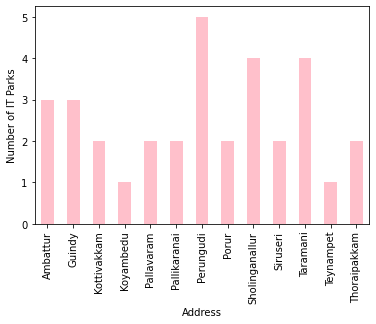

In [65]:
d1 = g1.plot(x="Address", y="count", color='pink',kind="bar")
d1.set_ylabel("Number of IT Parks")

###### Plot statuswise barchart

In [66]:
g1 = finaldata.groupby(['Status'])
g1=g1.size()
g1.reset_index(name='count')

,Status,count
0,2000,1
1,2006,5
2,2007,2
3,2008,3
4,2009,1
5,2011,1
6,Completed,4
7,PLANNING,4
8,UC,12


Text(0, 0.5, 'count')

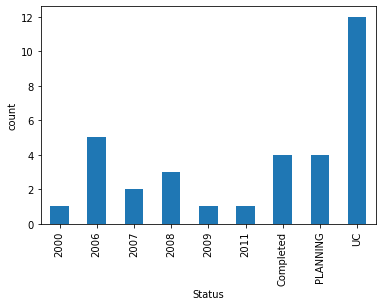

In [67]:
d1 = g1.plot(x="Status", y="count", kind="bar")
d1.set_ylabel("count")

###### Cluster based on Location

In [68]:
itpark = finaldata.drop(['Company name','Lakh sqft','Address','Status'],1)
itpark
k=13
kmeans = KMeans(n_clusters = k,random_state=0).fit(itpark)
print(kmeans.labels_)

[ 0  0  0  0  7  7  7 11 11 10  8  8  8  8  8 12 12  6  6  5  5  3  3  1
  1  1  4  4  9  2  2  2  2]


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


In [73]:
#finaldata.drop('Cluster Labels',inplace=True,axis=1)
finaldata.insert(0, 'Cluster Labels',kmeans.labels_)
finaldata.drop('join', inplace=True, axis=1)
finaldata

,Cluster Labels,Company name,Lakh sqft,Address,Status,Latitude,Longitude
0,0,Tidel Park,15.00,Taramani,2000,12.9863,80.2432
1,0,"International Tech Park, Chennai",20.00,Taramani,2011,12.9863,80.2432
2,0,IITM Research Park,8.20,Taramani,2008,12.9863,80.2432
3,0,RMZ Millenia - Phase II,17.00,Taramani,2008,12.9863,80.2432
4,7,Olympia Tech Park,13.00,Guindy,2006,13.0067,80.2206
5,7,RMZ Guindy (HTPL Site),16.00,Guindy,PLANNING,13.0067,80.2206
6,7,Ramaniyam - Bristol,0.80,Guindy,Completed,13.0067,80.2206
7,11,Bahwan CyberTek IT Park,1.80,Thoraipakkam,2006,12.9386,80.2377
8,11,Ceedeeyes Tech Park,1.48,Thoraipakkam,2006,12.9386,80.2377
9,10,Quanta Engineers,0.89,Teynampet,2006,13.0405,80.2503


In [71]:
cluster_itpark = folium.Map(location=[latitude ,longitude],zoom_start=11)
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat,lng,a,b,cluster in zip(finaldata['Latitude'],finaldata['Longitude'],finaldata['Company name'],finaldata['Status'],finaldata['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)                   
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(cluster_itpark)
       
cluster_itpark


######  Cluster on Status

In [74]:
event_dictionary ={'PLANNING' : 1, 'UC' : 2, 'Completed' : 3, '2000': 0,'2006':6,'2007':7,'2008':8,'2009':9,'2011':11}

# Add a new column named 'Price'
finaldata['scode'] = finaldata['Status'].map(event_dictionary)
  
# Print the DataFrame
finaldata.head(30)

,Cluster Labels,Company name,Lakh sqft,Address,Status,Latitude,Longitude,scode
0,0,Tidel Park,15.00,Taramani,2000,12.9863,80.2432,0
1,0,"International Tech Park, Chennai",20.00,Taramani,2011,12.9863,80.2432,11
2,0,IITM Research Park,8.20,Taramani,2008,12.9863,80.2432,8
3,0,RMZ Millenia - Phase II,17.00,Taramani,2008,12.9863,80.2432,8
4,7,Olympia Tech Park,13.00,Guindy,2006,13.0067,80.2206,6
5,7,RMZ Guindy (HTPL Site),16.00,Guindy,PLANNING,13.0067,80.2206,1
6,7,Ramaniyam - Bristol,0.80,Guindy,Completed,13.0067,80.2206,3
7,11,Bahwan CyberTek IT Park,1.80,Thoraipakkam,2006,12.9386,80.2377,6
8,11,Ceedeeyes Tech Park,1.48,Thoraipakkam,2006,12.9386,80.2377,6
9,10,Quanta Engineers,0.89,Teynampet,2006,13.0405,80.2503,6


In [75]:
itpark_status = finaldata.drop(['Company name','Lakh sqft','Address','Status','Latitude','Longitude','Cluster Labels'],1)
itpark_status
k=9
kmeans = KMeans(n_clusters = k,random_state=0).fit(itpark_status)
print(kmeans.labels_)


[0 4 8 8 6 5 7 6 6 6 6 7 2 7 7 1 2 3 2 1 2 2 5 5 5 8 2 2 2 2 2 2 2]


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


In [76]:
finaldata.drop('Cluster Labels',inplace=True,axis=1)
finaldata.insert(0, 'Cluster Labels',kmeans.labels_)
finaldata

,Cluster Labels,Company name,Lakh sqft,Address,Status,Latitude,Longitude,scode
0,0,Tidel Park,15.00,Taramani,2000,12.9863,80.2432,0
1,4,"International Tech Park, Chennai",20.00,Taramani,2011,12.9863,80.2432,11
2,8,IITM Research Park,8.20,Taramani,2008,12.9863,80.2432,8
3,8,RMZ Millenia - Phase II,17.00,Taramani,2008,12.9863,80.2432,8
4,6,Olympia Tech Park,13.00,Guindy,2006,13.0067,80.2206,6
5,5,RMZ Guindy (HTPL Site),16.00,Guindy,PLANNING,13.0067,80.2206,1
6,7,Ramaniyam - Bristol,0.80,Guindy,Completed,13.0067,80.2206,3
7,6,Bahwan CyberTek IT Park,1.80,Thoraipakkam,2006,12.9386,80.2377,6
8,6,Ceedeeyes Tech Park,1.48,Thoraipakkam,2006,12.9386,80.2377,6
9,6,Quanta Engineers,0.89,Teynampet,2006,13.0405,80.2503,6


In [82]:
cluster_status = folium.Map(location=[latitude ,longitude],zoom_start=11)
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat,lng,a,b,cluster in zip(finaldata['Latitude'],finaldata['Longitude'],finaldata['Company name'],finaldata['Status'],finaldata['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(b), parse_html=True)                   
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(cluster_status)
cluster_status.save('cluster_status.html')       
cluster_status


###### Conclusion: The above images helps in purchasing land near IT park under Construction that will be better for future investment